# Binary Confusion Matrix

---

Again, we will explore the Winsconsin Breast Cancer data, and dig deeper into the classification results. 🔍

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

np.random.seed(0)
X, y = load_breast_cancer(return_X_y=True)

**Q1**. Split your data into a training set of 80% of the data and a test set of 20%. Specify the `random_state` to 0 so that you get **reproducible** results.

In [2]:
# TODO: Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

**Q2**. Fit a Logistic Regression on your data. Evaluate accuracy.

In [6]:
# TODO: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logr = LogisticRegression(max_iter=2000)
logr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [7]:
y_pred = logr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

**Q3**. Now we want to understand better the performance than just the global accuracy. Explore the function `confusion_matrix` of scikit_learn, and use it to display the confusion matrix of your model.

In [11]:
# TODO: Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

**Q4**. Before analyzing it. Let's visualize it more properly (with color, axes label etc.).

- Display the confusion matrix in a more visual way with seaborn library
- Verify that your axes are correct

In [55]:
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [58]:
y.sum()

357

In [10]:
# TODO: Confusion matrix with seaborn
import seaborn as sns

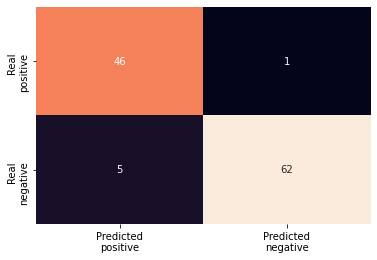

In [59]:
sns.heatmap(conf_matrix, annot = True, cbar = False, xticklabels=['Predicted\npositive', 'Predicted\nnegative'], yticklabels=['Real\npositive', 'Real\nnegative'])

Positive = has a malignant tumor (i.e. cancer) = y=0
Negative = has a benign tumor (i.e. no cancer) = y=1

**Q5**. Compute by hand Precision, Recall and F1_score

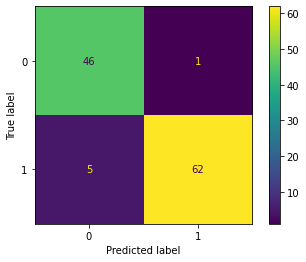

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logr, X_test, y_test)

In [61]:
# TODO: Classificaiton metrics
precision = 46 / (46+5)
recall = 46 / (46+1)
f1_score = (2*precision*recall)/(precision+recall)

In [62]:
precision, recall, f1_score

(0.9019607843137255, 0.9787234042553191, 0.9387755102040817)

**Q6**. Again, there is a built-in function in scikit-learn in order to compute those scores easily.

It is called `classification_report`. Use it and compare with your previous numbers.

In [63]:
# TODO: classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



As I took the labels 0 (i.e positive, i.e. has a cancer) to compute the score, we see that we have the correct values (0.98, 0.93 and 0.95)

**Q7**. Plot the ROC curve and compute the AUC (Area Under the Curve).
Don't hesitate to use scikit-learn

In [64]:
# TODO: Plot the ROC curve
from sklearn.metrics import plot_roc_curve, roc_auc_score

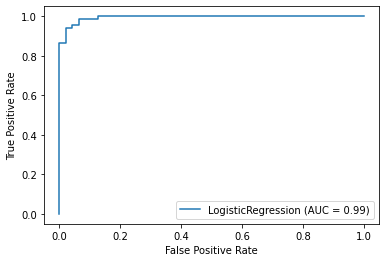

In [65]:
plot_roc_curve(logr, X_test, y_test)

In [70]:
pred_prob = logr.predict_proba(X_test)

In [73]:
# TODO: Compute the Area Under the Curve Score
roc_auc_score(y_test, pred_prob[:,-1])

0.9939663385201651

**Q8**. How would you analyze your model performance?

Model performance is quite good as we awnt to avoid False Negative (i.e. detect a person does not have a cancer although it has one). For this, we need the recall to be as high as possible. Here, the recall is 98% (we have only 1 FN).